In [1]:
import numpy as np
import pandas as pd

from my_framework.modeles.SIRModel import SIRModel
from my_framework.modeles.SEIRModel import SEIRModel
from my_framework.etl import get_dataset
from my_framework.plot import plot_simple_sir, plot_triple_sir, plotseird

# Country

## Data

In [2]:
country = "France"

In [3]:
df_data, pop_size = get_dataset(country)
print("Population : {}".format(pop_size))
df_data.head()

Population : 65129731


,confirm,recover,death
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,2,0,0
1/25/20,3,0,0
1/26/20,3,0,0


## SIR

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/lib/python3/dist-packages/my_framework/modeles/SIRModel.py:42: RuntimeWarning: overflow encountered in double_scalars
  dSdt = -beta * S * I / N
/usr/lib/python3/dist-packages/my_framework/modeles/SIRModel.py:43: RuntimeWarning: overflow encountered in double_scalars
  dIdt = beta * S * I / N - gamma * I
/usr/lib/python3/dist-packages/my_framework/modeles/SIRModel.py:44: RuntimeWarning: overflow encountered in double_scalars
  dRdt = gamma * I


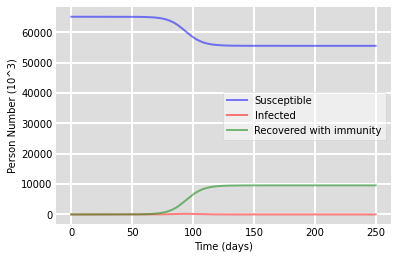

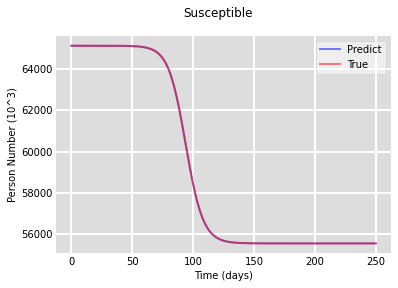

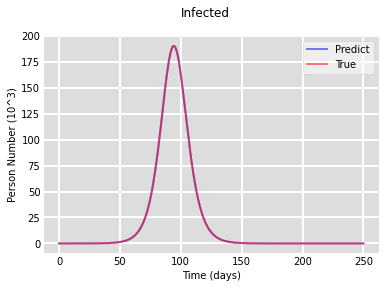

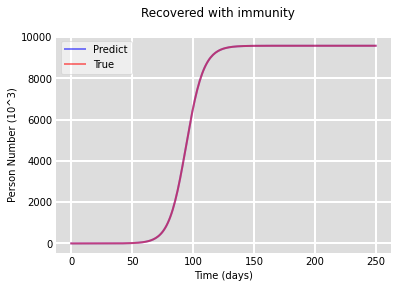

1.9078964087146963 1.7638406370432342


In [4]:
t = np.linspace(0, 250, 250)

model_sir = SIRModel()

model_sir.fit(df_data["confirm"], pop_size, 1)
S, I, R = model_sir.predict(t, pop_size, 1)
plot_simple_sir(t, S, I, R)
plot_triple_sir(t, S, I, R, S, I, R)
print(model_sir.params["beta"], model_sir.params["gamma"])                 

## SEIR

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


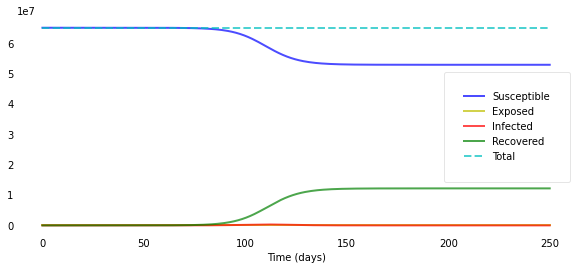

In [5]:
t = np.linspace(0, 250, 250)

seir_model = SEIRModel()
seir_model.fit(df_data["confirm"], pop_size, 1)

S, E, I, R = seir_model.predict(t, pop_size, 1)
plotseird(t, S, E, I, R )

In [6]:
df_data

,confirm,recover,death
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,2,0,0
1/25/20,3,0,0
1/26/20,3,0,0
...,...,...,...
5/1/20,167305,50212,24597
5/2/20,168518,50663,24763
5/3/20,168925,50885,24900
5/4/20,169583,51476,25204
